# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
#bibbliotecas.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf

In [2]:
#importando base de dados
tips_data = sns.load_dataset("tips")
tips_data['tip_pct'] = tips_data['tip']/(tips_data['total_bill'] - tips_data['tip'])
tips_data['net_bill'] = tips_data['total_bill'] - tips_data['tip']
tips = tips_data[tips_data['tip_pct']<0.5].copy()
tips.reset_index()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
#Regressão
reg=smf.ols('tip_pct  ~  net_bill', data = tips).fit()
tips['res']=reg.resid
reg.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.31e-12
Time:                        10:39:19   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

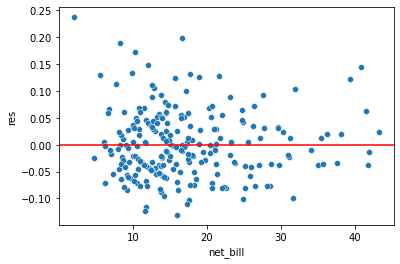

In [4]:
#Gráfico
sns.scatterplot(x ='net_bill', y='res',  data = tips)
plt.axhline(y=0, color = 'r')


#plt.legend()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [5]:
#Regressão
reg=smf.ols('tip_pct  ~  np.log(net_bill)', data = tips).fit()
tips['res']=reg.resid
reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.03e-14
Time:                        10:39:20   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023     16.261      0.000       0.336       0.428
np.log(net_bill)    -0.0702      0.009     -8.253      0.000      -0.087      -0.053
==============================================================================
Omnibus:                       15.660   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.845
Skew:                           0.631   Prob(JB):                     0.000220
Kurtosis:                       3.280   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

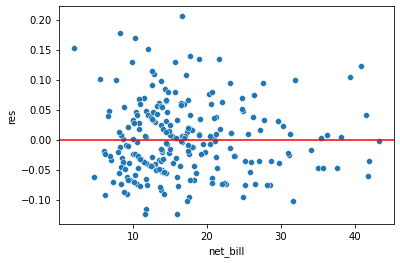

In [6]:
#Gráfico
sns.scatterplot(x ='net_bill', y='res',  data = tips)
plt.axhline(y=0, color = 'r')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [7]:
#Regressão
reg=smf.ols('tip_pct  ~  np.power(net_bill,2)', data = tips).fit()
tips['res']=reg.resid
reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     43.61
Date:                Thu, 05 May 2022   Prob (F-statistic):           2.56e-10
Time:                        10:39:20   Log-Likelihood:                 326.27
No. Observations:                 242   AIC:                            -648.5
Df Residuals:                     240   BIC:                            -641.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2171      0.006     38.106      0.000       0.206       0.228
np.power(net_bill, 2) -7.577e-05   1.15e-05     -6.603      0.000   -9.84e-05   -5.32e-05
==============================================================================
Omnibus:                       31.950   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.955
Skew:                           0.826   Prob(JB):                     1.73e-10
Kurtosis:                       4.315   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

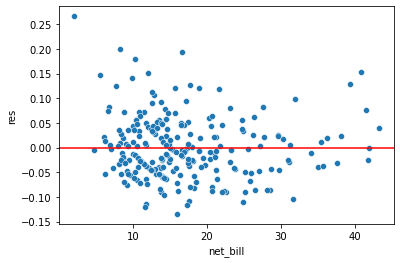

In [8]:
#Gráfico
sns.scatterplot(x ='net_bill', y='res',  data = tips)
plt.axhline(y=0, color = 'r')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [9]:
#Regressão
reg=smf.ols('np.log(tip_pct)  ~  net_bill', data = tips).fit()
tips['res']=reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Thu, 05 May 2022   Prob (F-statistic):           5.70e-15
Time:                        10:39:20   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

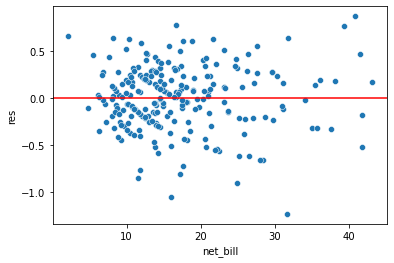

In [10]:
#Gráfico
sns.scatterplot(x ='net_bill', y='res',  data = tips)
plt.axhline(y=0, color = 'r')

In [11]:
#Calcular o R2
tips['pred_y']= np.exp(reg.fittedvalues)
r2 = tips[['pred_y','tip_pct']].corr().iloc[0,1]**2
r2

0.20051484016183757

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [12]:
#Regressão
reg=smf.ols('np.log(tip_pct)  ~  np.log(net_bill)', data = tips).fit()
tips['res']=reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Thu, 05 May 2022   Prob (F-statistic):           2.65e-15
Time:                        10:39:20   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)    -0.4027      0.048     -8.460      0.000      -0.496      -0.309
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

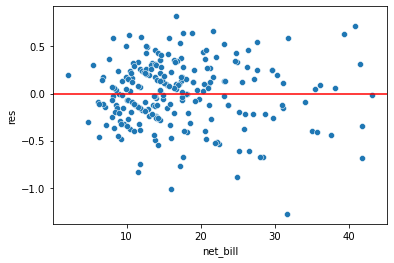

In [13]:
#Gráfico
sns.scatterplot(x ='net_bill', y='res',  data = tips)
plt.axhline(y=0, color = 'r')

In [14]:
#Calcular o R2
tips['pred_y']= np.exp(reg.fittedvalues)
r2 = tips[['pred_y','tip_pct']].corr().iloc[0,1]**2
r2

0.229143365170227

###  6. qual modelo resultou no melhor ajuste?

Os modelos 2 e 5 obtiveram um melhor ajuste, atingindo respectivamente um R2 de 0,221 e 0,229. Além disto eliminaram os padrões dos gráficos de residuos. 